# Imports

In [25]:
%load_ext autoreload
%autoreload 2
from fastai import *
from fastai.text import *
from fastai.callbacks import *
from shutil import copyfile

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Parameters

In [13]:
p_in_bs=128

# Paths

In [28]:
base_wikipedia_path = '/storage/Data/NLPData/Wikipedia'

wikipedia_tokenized_pickle_file_name = 'wikipedia_100_tokenized.pkl'
wikipedia_tokenized_itos_pickle_file_name = 'wikipedia_100_tokenized_itos.pkl'

wikipedia_trained_language_model_file_name = 'wikipedia_60kvocab_100Mtokens.pth'

In [15]:
PATH = Path(base_wikipedia_path)

In [6]:
PATH

PosixPath('/storage/Data/NLPData/Wikipedia')

# Training

In [16]:
data_lm_full = load_data(PATH, wikipedia_tokenized_pickle_file_name, bs=p_in_bs)

In [8]:

len(data_lm_full.train_ds.vocab.itos)

60004

In [9]:
data_lm_full.show_batch()

idx,text
0,", 1758 ) è assai diffusa in xxmaj europa . \n xxbos xxmaj battaglia di xxmaj xxunk \n \n xxmaj la battaglia di xxmaj xxunk fu combattuta il 3 e il 4 agosto 1796 tra l'esercito francese del generale xxmaj napoleone xxmaj bonaparte e un corpo d'armata tipo colonna austriaca guidata dal feldmaresciallo xxmaj peter xxmaj xxunk von xxmaj xxunk . \n \n xxmaj cenni storici ."
1,"xxmaj leone di xxmaj lucerna , opera di xxmaj xxunk xxmaj xxunk , che xxunk il sacrificio della guardia svizzera . xxmaj il nome del fratello vi è inciso al secondo posto della lista dei caduti . xxmaj morì nel 1831 nella propria casa alla ragguardevole età di 91 anni . \n \n xxmaj gradi xxmaj militari . \n 1758 xxmaj alfiere ( xxmaj reggimento xxmaj xxunk )"
2,"notazione classica . xxmaj gli spazi possono anche essere inseriti all'inizio e / o alla fine delle xxunk per rendere la scrittura in xxmaj abc più leggibile . \n \n xxmaj ripetizioni . \n xxmaj le xxmaj ripetizioni sono specificate con il simbolo dei "" due punti "" : . xxmaj l'inizio di una sezione ripetuta del brano è scritta con | : e la fine di una"
3,"xxmaj xxunk und xxmaj xxunk der xxmaj xxunk xxmaj deutschen xxmaj xxunk "" di xxmaj weimar ma xxmaj xxunk si decise per la biblioteca comunale e regionale "" xxmaj heinrich xxmaj heine "" di xxmaj gotha e dal 1953 fino al pensionamento nel 1985 ne fu direttore . xxmaj la prima moglie , xxmaj xxunk , partì per la xxmaj germania xxmaj ovest insieme con lo scrittore xxmaj peter xxmaj"
4,"svizzera . \n xxbos xxmaj lavori sporchi \n \n xxmaj lavori sporchi ( "" xxmaj dirty xxmaj jobs "" ) è un programma trasmesso su xxmaj discovery xxmaj channel in cui il conduttore xxmaj mike xxmaj rowe viene ripreso mentre sta svolgendo incarichi xxunk , strani o molto sporchi caratteristici di alcune professioni . xxmaj la trasmissione è cominciata con 3 episodi pilota nel novembre 2003 , ritornando"


In [17]:

learn = language_model_learner(data_lm_full,AWD_LSTM, pretrained=False,  callback_fns=ShowGraph)


In [ ]:
learn.lr_find()
learn.recorder.plot(skip_start=0)

epoch,train_loss,valid_loss,accuracy,time
0,3.862753,3.717139,0.332310,1:43:14
1,4.018489,3.873284,0.320182,1:43:11
2,4.117584,3.958606,0.312913,1:43:04
3,4.086537,3.924147,0.316406,1:43:07


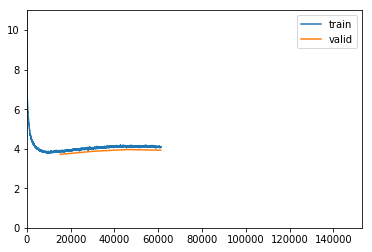

Better model found at epoch 0 with accuracy value: 0.33231034874916077.


In [ ]:

learn.fit_one_cycle(10, 3e-2, moms=(0.8,0.7),callbacks=[ShowGraph(learn), SaveModelCallback(learn,monitor='accuracy',mode='max')])

In [29]:
copyfile(PATH/'models/bestmodel.pth',PATH/wikipedia_trained_language_model_file_name);

In [23]:
TEXT = "Le montagne dell'interno dei balcani"
N_WORDS = 400
N_SENTENCES = 1

In [24]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

Le montagne dell'interno dei balcani 
 
  La foresta del Pacifico è un film del 1968 diretto da Dipartimento di Chimica Sperimentale . 
 
  La commedia ruota su un lato del Mediterraneo , il cui testo è caratterizzato da un carattere di scena e che parla delle canzoni che incise lirica . La sceneggiatura di La Fenice era stata rappresentata con la medesima forma di film , tra cui il " Estasi " ( " La grande festa " , " Le avventure di Gesù " , " Il Mulino Diavolo " di Mazza , " La madre di Siviglia " , " La tavola più alta " , " Le nuove avventure di San Marco " di Enrico Foscolo , " La Traviata " , di Giulio Brandi ) , " La Spugna " di Umberto Tozzi ( e " Il barbiere del Cuore " ) , Luigi Zampa di Arnaldo Vico ( Lo Climi ) e " Il giovane Manicomio " di Italo Sacchi , dal quale Bianchini era il fratello di Tiberio e " Falstaff " ( Giulia ) . 
 
  Produzione . 
  La commedia è stata prodotta da Rai 1 . 
  Il film è stato presentato in concorso alla Mostra di Venezia e alla Mostra intern